<a href="https://colab.research.google.com/github/SANGRAMLEMBE/MTech/blob/main/MLA_practical/MLA_lab1_student_dirty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
student_dirty = pd.read_csv('/content/student_scores_dirty - student_scores_dirty.csv')

In [4]:
student_dirty.head()

,Student_ID,Hours_Studied,Attendance_Rate,Assignments_Completed,Exam_Score
0,1,1.0,85%,8.0,35.0
1,2,2.0,90%,NaN,45.0
2,3,NaN,NaN,7.0,50.0
3,4,4.0,75 %,5.0,NaN
4,5,200.0,80%,9.0,65.0


In [5]:
student_dirty

,Student_ID,Hours_Studied,Attendance_Rate,Assignments_Completed,Exam_Score
0,1,1.0,85%,8.0,35.0
1,2,2.0,90%,NaN,45.0
2,3,NaN,NaN,7.0,50.0
3,4,4.0,75 %,5.0,NaN
4,5,200.0,80%,9.0,65.0
5,6,6.0,NaN,8.0,70.0
6,7,NaN,88%,NaN,75.0
7,8,8.0,95%,10.0,NaN
8,9,9.0,65%,4.0,90.0
9,10,10.0,70%,3.0,95.0


In [6]:
std_hr_median = student_dirty.Hours_Studied.median()

- student_dirty['Attendance_Rate'] = student_dirty['Attendance_Rate'].str.replace('%', '').str.strip(): This line cleans the 'Attendance_Rate' column.
.str.replace('%', '') removes the '%' symbol from each string in the column.
.str.strip() removes any leading or trailing whitespace from each string.

- student_dirty['Attendance_Rate'] = pd.to_numeric(student_dirty['Attendance_Rate']): This line converts the cleaned 'Attendance_Rate' column to a numeric data type. This is necessary for mathematical operations like calculating the mean.
- print(student_dirty.Attendance_Rate.mean()): This line calculates the mean (average) of the now numeric 'Attendance_Rate' column and prints it to the console.


In [7]:
student_dirty['Attendance_Rate'] = student_dirty['Attendance_Rate'].str.replace('%', '').str.strip()
student_dirty['Attendance_Rate'] = pd.to_numeric(student_dirty['Attendance_Rate'])
print(student_dirty.Attendance_Rate.mean())



81.0


In [8]:
std_rate_mean = student_dirty.Attendance_Rate.mean()

In [9]:
std_assign_comp_median = student_dirty.Assignments_Completed.median()

In [10]:
import math

mean_Exam = math.floor(student_dirty.Exam_Score.mean())   # import math for taking value  in numbers
print(mean_Exam)

65


## fillna function

In [11]:
student_dirty.Hours_Studied = student_dirty.Hours_Studied.fillna(std_hr_median)
student_dirty.Attendance_Rate = student_dirty.Attendance_Rate.fillna(std_rate_mean)
student_dirty.Assignments_Completed = student_dirty.Assignments_Completed.fillna(std_assign_comp_median)
student_dirty.Exam_Score = student_dirty.Exam_Score.fillna(mean_Exam)

In [12]:
student_dirty

,Student_ID,Hours_Studied,Attendance_Rate,Assignments_Completed,Exam_Score
0,1,1.0,85.0,8.0,35.0
1,2,2.0,90.0,7.5,45.0
2,3,7.0,81.0,7.0,50.0
3,4,4.0,75.0,5.0,65.0
4,5,200.0,80.0,9.0,65.0
5,6,6.0,81.0,8.0,70.0
6,7,7.0,88.0,7.5,75.0
7,8,8.0,95.0,10.0,65.0
8,9,9.0,65.0,4.0,90.0
9,10,10.0,70.0,3.0,95.0


In [13]:
# split the dataset

x = student_dirty[['Attendance_Rate', 'Hours_Studied', 'Assignments_Completed']]
y = student_dirty[['Exam_Score']]

In [14]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 101)

In [15]:
x_train

,Attendance_Rate,Hours_Studied,Assignments_Completed
0,85.0,1.0,8.0
4,80.0,200.0,9.0
9,70.0,10.0,3.0
3,75.0,4.0,5.0
5,81.0,6.0,8.0
7,95.0,8.0,10.0
6,88.0,7.0,7.5
1,90.0,2.0,7.5


In [16]:
x_test

,Attendance_Rate,Hours_Studied,Assignments_Completed
8,65.0,9.0,4.0
2,81.0,7.0,7.0


In [17]:
y_train

,Exam_Score
0,35.0
4,65.0
9,95.0
3,65.0
5,70.0
7,65.0
6,75.0
1,45.0


In [18]:
y_test

,Exam_Score
8,90.0
2,50.0


In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
reg  = LinearRegression()

In [21]:
reg.fit(x_train,y_train)

LinearRegression()

In [48]:
prediction_y_train = reg.predict(x_train)
prediction_y_train

array([[59.20528794],
       [66.5067318 ],
       [83.60679536],
       [73.82534557],
       [59.94139334],
       [49.58420189],
       [61.41931045],
       [60.91093366]])

In [45]:
prediction_y_test = reg.predict(x_test)
prediction_y_test

array([[79.68231203],
       [64.4351982 ]])

In [24]:
y_test

,Exam_Score
8,90.0
2,50.0


In [25]:
print(reg.intercept_)

[104.32902604]


In [26]:
reg.coef_

array([[-0.11386431,  0.05612964, -4.43767522]])

In [27]:
reg.predict([[100,	5,	8]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[57.7218419]])

In [28]:

-0.11386431*100 +  0.05612964*5  -4.43767522*8 + 104.32

57.71281543999999

- yy = reg.intercept_ + x @ reg.coef_.T:
- reg.intercept_: This is the y-intercept of the linear regression model. It's the predicted value of the exam score when all other features (Attendance Rate, Hours Studied, and Assignments Completed) are zero.
- x: This is the DataFrame containing the features (Attendance Rate, Hours Studied, and Assignments Completed) for which you want to make predictions.
- reg.coef_.T:    This is the transpose of the coefficients of the linear regression model. The coefficients represent the change in the predicted exam score for a one-unit increase in each respective feature, holding other features constant. **We use the transpose to align the dimensions for matrix multiplication.**
- @:  This symbol represents matrix multiplication. The features (x) are multiplied by the transposed coefficients (reg.coef_.T).
reg.intercept_ + ...: The intercept is added to the result of the matrix multiplication. This entire calculation follows the linear regression equation: y = intercept + (coefficient_1 * feature_1) + (coefficient_2 * feature_2) + ...
- yy = ...: The calculated predicted values are stored in the variable yy.
- round(yy,0): This rounds the predicted values in the yy DataFrame to 0 decimal places. This is often done to make the predictions easier to interpret, especially if the exam scores are expected to be whole numbers.


In [29]:
yy = reg.intercept_ + x @ reg.coef_.T
round(yy,0)

,0
0,59.0
1,61.0
2,64.0
3,74.0
4,67.0
5,60.0
6,61.0
7,50.0
8,80.0
9,84.0


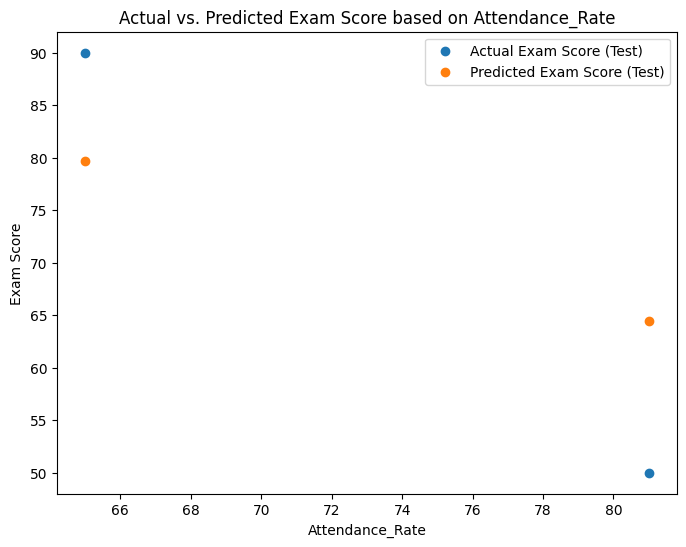

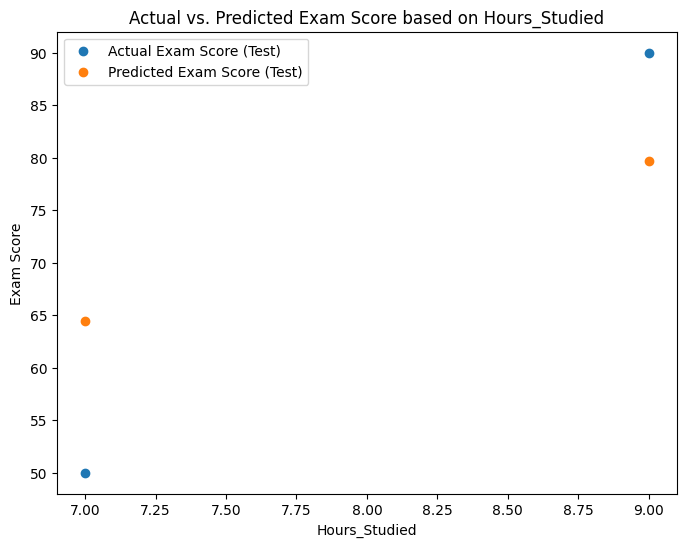

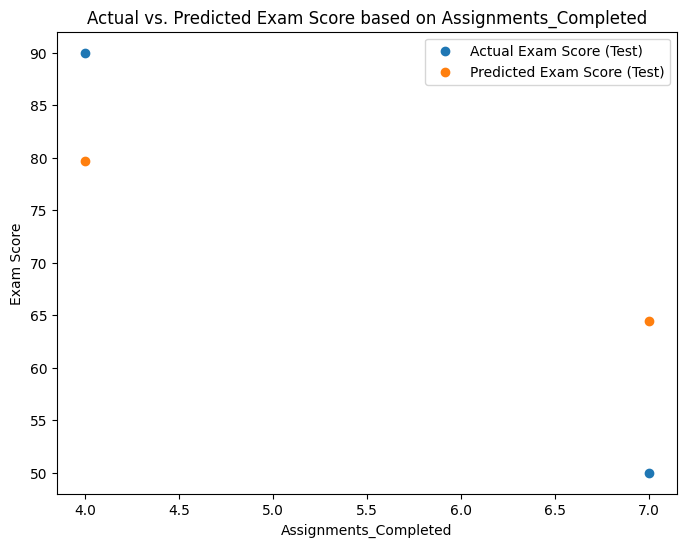

In [38]:
# Get the names of the independent variables
indep_variables = x.columns

# plot each independent variable against the actual and predicted exam score

for col in indep_variables:
    plt.figure(figsize=(8,6)) # Create a new figure for each plot

    # Plot actual vs. predicted for the training set
    #plt.scatter(x_train[col], y_train, label='Actual Exam Score (Train)')
    #plt.scatter(x_train[col], reg.predict(x_train), label='Predicted Exam Score (Train)') # Use predictions for train set

    # Plot actual vs. predicted for the testing set
    plt.scatter(x_test[col], y_test, label='Actual Exam Score (Test)')
    plt.scatter(x_test[col], reg.predict(x_test), label='Predicted Exam Score (Test)') # Use predictions for test set


    plt.xlabel(col)
    plt.ylabel('Exam Score')
    plt.title(f'Actual vs. Predicted Exam Score based on {col}')
    plt.legend()
    plt.show()

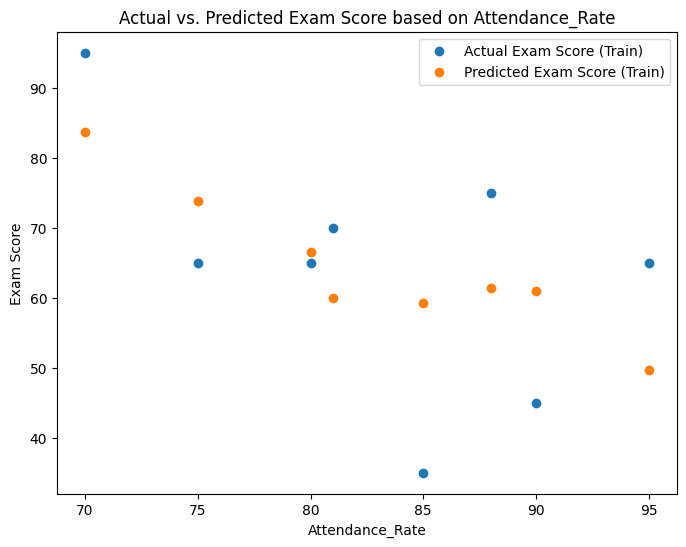

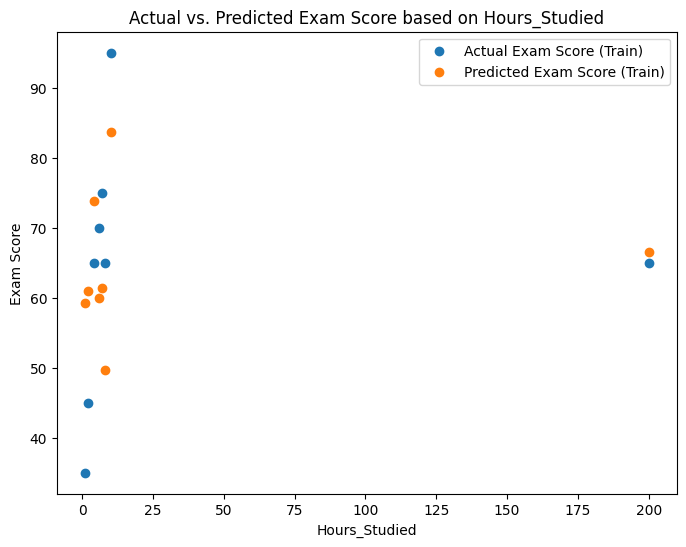

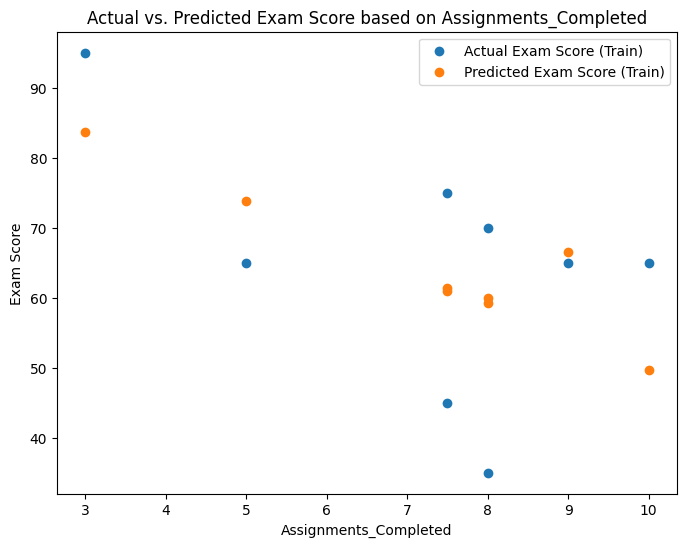

In [52]:
# Get the names of the independent variables
indep_variables = x.columns

# plot each independent variable against the actual and predicted exam score

for col in indep_variables:
    plt.figure(figsize=(8,6)) # Create a new figure for each plot

    # Plot actual vs. predicted for the training set
    plt.scatter(x_train[col], y_train, label='Actual Exam Score (Train)')
    plt.scatter(x_train[col], reg.predict(x_train), label='Predicted Exam Score (Train)') # Use predictions for train set

    # Plot actual vs. predicted for the testing set
    #plt.scatter(x_test[col], y_test, label='Actual Exam Score (Test)')
    #plt.scatter(x_test[col], reg.predict(x_test), label='Predicted Exam Score (Test)') # Use predictions for test set


    plt.xlabel(col)
    plt.ylabel('Exam Score')
    plt.title(f'Actual vs. Predicted Exam Score based on {col}')
    plt.legend()
    plt.show()

In [49]:
print(y_test)
print(prediction_y_test)

   Exam_Score
8        90.0
2        50.0
[[79.68231203]
 [64.4351982 ]]


In [50]:
# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = mean_absolute_error(y_test , prediction_y_test)
mse = mean_squared_error(y_test , prediction_y_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test , prediction_y_test)

In [51]:
print(mae,mse,rmse,r2)

12.376443085089711 157.41481605067017 12.54650612922459 0.6064629598733247
